In [ ]:
import pandas as pd
import csv
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import re
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# df1 = pd.DataFrame(columns=['train', 'softINT','hardIntKink'],index=['PMB', 'INT', 'DISC', 'KINK', 'MVS', 'FIO2', 'APL', 'ANES', 'SHNT',
#        'PAP', 'TPR', 'VMCH', 'VTUB', 'PRSS', 'VLNG', 'VALV', 'MINV', 'ACO2',
#        'PVS', 'SAO2', 'CCHL'])
# df2 = pd.DataFrame(columns=['train', 'softINT','hardIntKink'],index=['PMB', 'INT', 'DISC', 'KINK', 'MVS', 'FIO2', 'APL', 'ANES', 'SHNT',
#        'PAP', 'TPR', 'VMCH', 'VTUB', 'PRSS', 'VLNG', 'VALV', 'MINV', 'ACO2',
#        'PVS', 'SAO2', 'CCHL'])

df1 = pd.DataFrame(columns=['train', 'softINT','hardIntKink'],index=['ACO2', 'VLNG'])
df2 = pd.DataFrame(columns=['train', 'softINT','hardIntKink'],index=['ACO2', 'VLNG'])

In [ ]:
# ALARM TESTING LINEAR

# # Testing Data 1 -> Soft Int
# df = pd.read_csv("/content/drive/MyDrive/TL3_CTrain2.csv")
# df = df.apply(LabelEncoder().fit_transform)

# # X_test = df.drop(['ECO2'],axis = 1)
# X_test = df[['ACO2', 'VLNG']]
# y_test = df['ECO2']

# # Testing Data 2 -> Hard Int & Kink
# df = pd.read_csv("/content/drive/MyDrive/TL3_CTest.csv")
# df = df.apply(LabelEncoder().fit_transform)

# # X_test = df.drop(['ECO2'],axis = 1)
# X_test = df[['ACO2', 'VLNG']]
# y_test = df['ECO2']


In [ ]:
# ALARM DATASET

# df = pd.read_csv("/content/drive/MyDrive/TL3_CTrain1.csv")
# df = pd.read_csv("/content/drive/MyDrive/TL3_CTrain2.csv")
df = pd.read_csv("/content/drive/MyDrive/TL3_CTest.csv")
df = df.apply(LabelEncoder().fit_transform)

# X_train,X_test,y_train,y_test = train_test_split(df.drop(['ECO2'],axis = 1), df['ECO2'],test_size=0.2)
X_train,X_test,y_train,y_test = train_test_split(df[['ACO2', 'VLNG']], df['ECO2'],test_size=0.2)


In [ ]:
# Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators = 1000,random_state=49)

model = abc.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.93      0.73      0.82        71
           1       0.87      0.97      0.92       129

    accuracy                           0.89       200
   macro avg       0.90      0.85      0.87       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
importances = model.feature_importances_
importances
# import matplotlib.pyplot as plt
# indices = np.argsort(importances)

# fig, ax = plt.subplots(figsize=(8, 8))

# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(X_train.columns)[indices])


array([0.461, 0.535])

In [ ]:
for i in range(2):
  df1['hardIntKink'][i] = importances[i]

In [ ]:
df1

,train,softINT,hardIntKink
ACO2,0.005,0.042,0.461
VLNG,0.931,0.926,0.535


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

clf = RandomForestClassifier(n_estimators = 1000,random_state=49,class_weight='balanced')  
model2 = clf.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)
  
print("ACCURACY OF RANDOM FOREST THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

ACCURACY OF RANDOM FOREST THE MODEL:  0.885
              precision    recall  f1-score   support

           0       0.93      0.73      0.82        71
           1       0.87      0.97      0.92       129

    accuracy                           0.89       200
   macro avg       0.90      0.85      0.87       200
weighted avg       0.89      0.89      0.88       200



In [ ]:
importances = model2.feature_importances_
importances
# import matplotlib.pyplot as plt
# indices = np.argsort(importances)

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# _ = ax.set_yticklabels(np.array(X_train.columns)[indices])

array([0.36372846, 0.63627154])

In [ ]:
for i in range(2):
  df2['hardIntKink'][i] = importances[i]

In [ ]:
df2

,train,softINT,hardIntKink
ACO2,0.519754,0.623655,0.363728
VLNG,0.480246,0.376345,0.636272


In [ ]:
from google.colab import files

df2.to_csv(r'TL_FeatureImp_CRF.csv', header = True, index = False)
df1.to_csv(r'TL_FeatureImp_CAda.csv', header = True, index = False)
files.download('TL_FeatureImp_CRF.csv')
files.download('TL_FeatureImp_CAda.csv')

In [ ]:
df1n = df1.astype(float)
df2n = df2.astype(float)

df1n['SInt_diff'] = df1n['train'] - df1n['softINT']
df1n['HIntKink_diff'] = df1n['train'] - df1n['hardIntKink']

df2n['SInt_diff'] = df2n['train'] - df2n['softINT']
df2n['HIntKink_diff'] = df2n['train'] - df2n['hardIntKink']

df2n = df2n.drop(['softINT','train','hardIntKink'], axis = 1)
df1n = df1n.drop(['softINT','train','hardIntKink'], axis = 1)

In [ ]:
# df1 = pd.read_csv("/content/drive/MyDrive/TL_FeatureImp_CRF.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/TL_FeatureImp_CAda.csv")

df1 = pd.read_csv("/content/drive/MyDrive/TL_FeatureImp_RRF.csv")
df2 = pd.read_csv("/content/drive/MyDrive/TL_FeatureImp_RAda.csv")

df2 = df2.drop(['hardINT'], axis = 1)
df1 = df1.drop(['hardINT'], axis = 1)

df1.rename(index = {0: "PMB", 1:"INT", 2:"DISC",3:"KINK", 4:"MVS", 5:"FIO2", 6:"APL", 7:"ANES", 8:"SHNT", 9:"PAP",
                     10:"TPR", 11:"VMCH", 12:"VTUB", 13:"PRSS", 14:"VLNG",15:"VALV", 16:"MINV",17:"ACO2",18:"PVS",19:"SAO2",20:"CCHL"},
                                 inplace = True)
df2.rename(index = {0: "PMB", 1:"INT", 2:"DISC",3:"KINK", 4:"MVS", 5:"FIO2", 6:"APL", 7:"ANES", 8:"SHNT", 9:"PAP",
                     10:"TPR", 11:"VMCH", 12:"VTUB", 13:"PRSS", 14:"VLNG",15:"VALV", 16:"MINV",17:"ACO2",18:"PVS",19:"SAO2",20:"CCHL"},
                                 inplace = True)

df1.rename(columns = {'train':'Domain 1', 'softINT':'Domain 2',
                              'hardIntKink':'Domain 3'}, inplace = True)
df2.rename(columns = {'train':'Domain 1', 'softINT':'Domain 2',
                              'hardIntKink':'Domain 3'}, inplace = True)

df1n = df1.astype(float)
df2n = df2.astype(float)

In [ ]:
df1n = df1n.sort_values(by=['Domain 1'], ascending=False)
df2n = df2n.sort_values(by=['Domain 1'], ascending=False)

In [ ]:
a1 = df1n['Domain 1']
a2 = df1n['Domain 2']
a3 = df1n['Domain 3']

a1=a1.sort_values(ascending=False)
a2=a2.sort_values(ascending=False)
a3=a3.sort_values(ascending=False)

a1=a1.reset_index(drop=True)
a2=a2.reset_index(drop=True)
a3=a3.reset_index(drop=True)



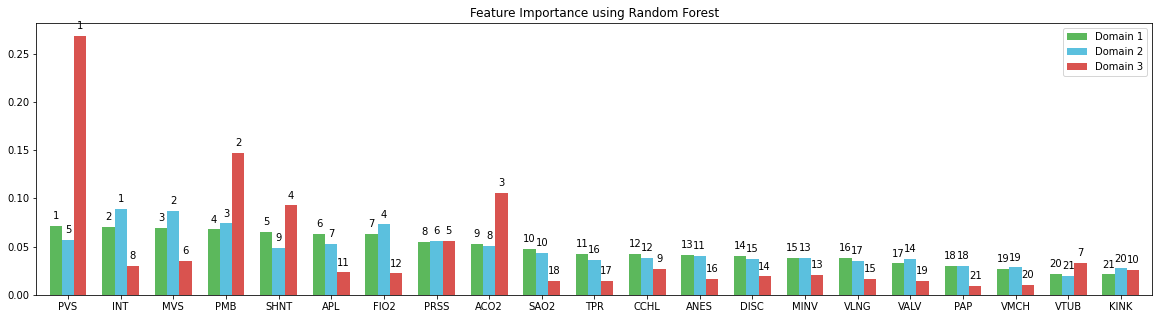

In [ ]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']

# plot with annotations is probably easier
p1 = df1n.plot.bar(width=0.7, color=colors, figsize=(20, 5),title='Feature Importance using Random Forest')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)

for p in p1.patches:
  # if p.get_height() > 0.0001:
    # p1.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    n = p.get_height()
    # print(n)
    r = 0
    if (a1[a1 == n].any()): r = a1[a1 == n].index[0]+1
    if (a2[a2 == n].any()): r = a2[a2 == n].index[0]+1
    if (a3[a3 == n].any()): r = a3[a3 == n].index[0]+1

    p1.annotate(r, (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

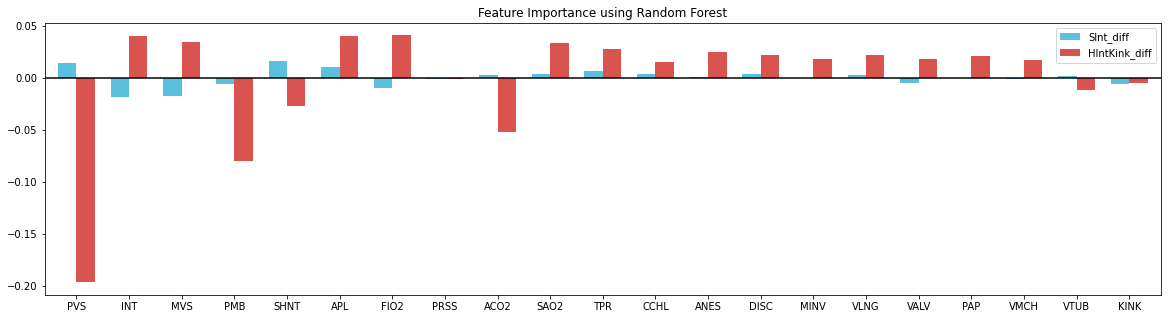

In [ ]:
colors = ['#5bc0de', '#d9534f']

df = df1n
df['SInt_diff'] = df['train'] - df['softINT']
df['HIntKink_diff'] = df['train'] - df['hardIntKink']
df = df.drop(['softINT','train','hardIntKink'], axis = 1)

# plot with annotations is probably easier
p1 = df.plot.bar(width=0.7, color=colors,rot=0, figsize=(20, 5),title='Feature Importance Differences using Random Forest')
plt.axhline(0, color='black')

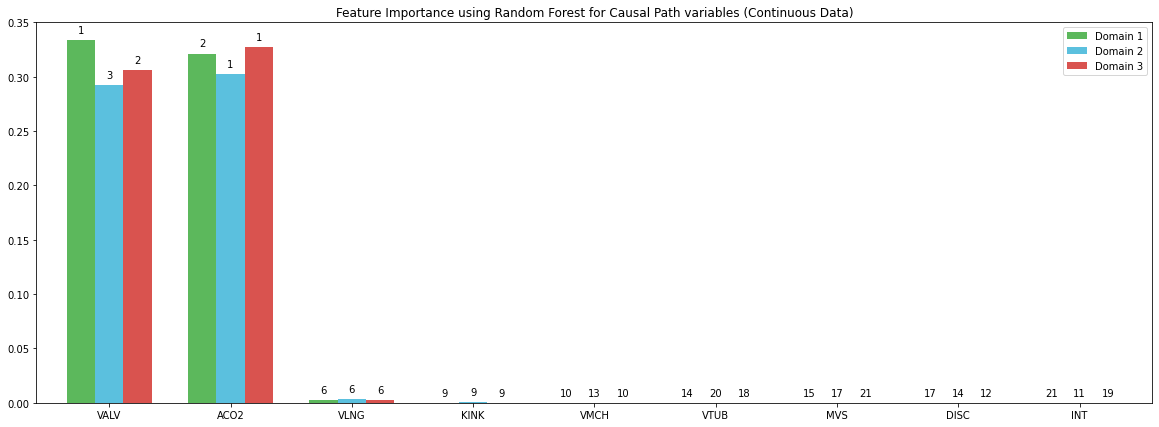

In [ ]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']

dfn = df1n.loc[['VALV','VLNG','INT','KINK','ACO2','DISC','VTUB','VMCH','MVS']]
dfn = dfn.sort_values(by=['Domain 1'], ascending=False)

# plot with annotations is probably easier
p1 = dfn.plot.bar(width=0.7, color=colors, figsize=(20, 7),title='Feature Importance using Random Forest for Causal Path variables (Continuous Data)')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)

for p in p1.patches:
  # if p.get_height() > 0.0001:
    # p1.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    n = p.get_height()
    # print(n)
    r = 0
    if (a1[a1 == n].any()): r = a1[a1 == n].index[0]+1
    if (a2[a2 == n].any()): r = a2[a2 == n].index[0]+1
    if (a3[a3 == n].any()): r = a3[a3 == n].index[0]+1

    p1.annotate(r, (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RRF.pdf')

files.download('TLp_RRF.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

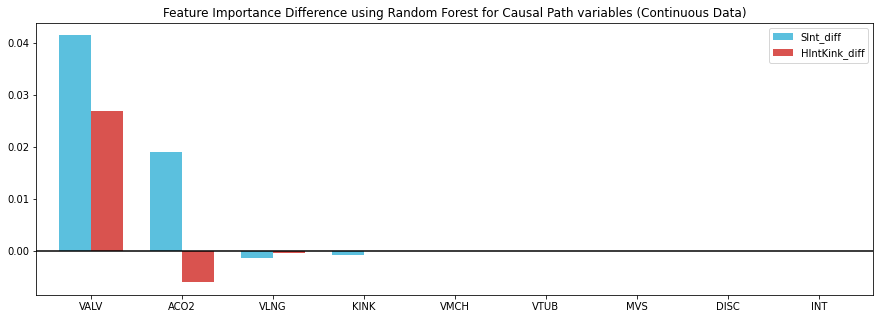

In [ ]:
colors = ['#5bc0de', '#d9534f']

df = df1n.loc[['VALV','VLNG','INT','KINK','ACO2','DISC','VTUB','VMCH','MVS']]
df = df.sort_values(by=['Domain 1'], ascending=False)
df['SInt_diff'] = df['Domain 1'] - df['Domain 2']
df['HIntKink_diff'] = df['Domain 1'] - df['Domain 3']
df = df.drop(['Domain 2','Domain 1','Domain 3'], axis = 1)

# plot with annotations is probably easier
p1 = df.plot.bar(width=0.7, color=colors, figsize=(15, 5),title='Feature Importance Difference using Random Forest for Causal Path variables (Continuous Data)')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)
plt.axhline(0, color='black')


In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RRF_diff.pdf')

files.download('TLp_RRF_diff.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
a1 = df2n['Domain 1']
a2 = df2n['Domain 2']
a3 = df2n['Domain 3']

a1=a1.sort_values(ascending=False)
a2=a2.sort_values(ascending=False)
a3=a3.sort_values(ascending=False)

a1=a1.reset_index(drop=True)
a2=a2.reset_index(drop=True)
a3=a3.reset_index(drop=True)



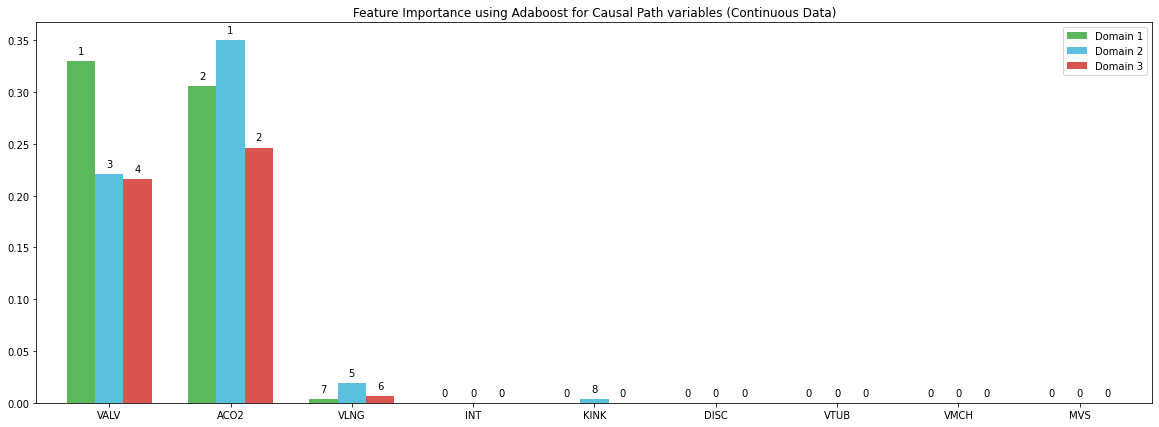

In [ ]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']

dfn = df2n.loc[['VALV','VLNG','INT','KINK','ACO2','DISC','VTUB','VMCH','MVS']]
dfn = dfn.sort_values(by=['Domain 1'], ascending=False)

# plot with annotations is probably easier
p1 = dfn.plot.bar(width=0.7, color=colors, figsize=(20, 7),title='Feature Importance using Adaboost for Causal Path variables (Continuous Data)')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)

for p in p1.patches:
  # if p.get_height() > 0.0001:
    # p1.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    n = p.get_height()
    # print(n)
    r = 0
    if (a1[a1 == n].any()): r = a1[a1 == n].index[0]+1
    if (a2[a2 == n].any()): r = a2[a2 == n].index[0]+1
    if (a3[a3 == n].any()): r = a3[a3 == n].index[0]+1

    p1.annotate(r, (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RAda.pdf')

files.download('TLp_RAda.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

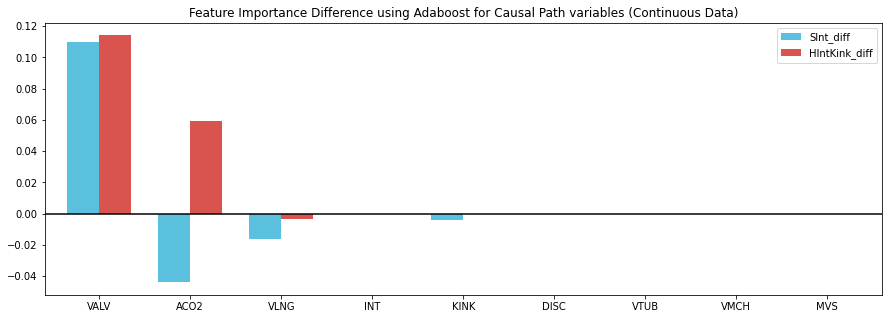

In [ ]:
colors = ['#5bc0de', '#d9534f']

df = df2n.loc[['VALV','VLNG','INT','KINK','ACO2','DISC','VTUB','VMCH','MVS']]
df = df.sort_values(by=['Domain 1'], ascending=False)
df['SInt_diff'] = df['Domain 1'] - df['Domain 2']
df['HIntKink_diff'] = df['Domain 1'] - df['Domain 3']
df = df.drop(['Domain 2','Domain 1','Domain 3'], axis = 1)

# plot with annotations is probably easier
p1 = df.plot.bar(width=0.7, color=colors, figsize=(15, 5),title='Feature Importance Difference using Adaboost for Causal Path variables (Continuous Data)')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)
plt.axhline(0, color='black')

In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RAda_diff.pdf')

files.download('TLp_RAda_diff.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MARKOV BLANKET

In [ ]:
import pandas as pd
# RF
df1 = {'Domain 1':  [0.519754, 0.480246],
        'Domain 2': [0.623655,0.376345],
        'Domain 3': [0.363728,0.636272]
        }

df1 = pd.DataFrame(df1)

# Ada
df2 = {'Domain 1':  [0.005,0.931],
        'Domain 2': [0.042,0.926],
        'Domain 3': [0.461,0.535]
        }

df2 = pd.DataFrame(df2)

In [ ]:
import pandas as pd
# Continuous Data
# RF
df1 = {'Domain 1':  [0.993206, 0.00679356],
        'Domain 2': [0.986078,0.0139218],
        'Domain 3': [0.987533,0.0124666]
        }

df1 = pd.DataFrame(df1)

# Ada
df2 = {'Domain 1':  [0.990189,0.00981079],
        'Domain 2': [0.983004,0.0169964],
        'Domain 3': [0.980315,0.0196853]
        }

df2 = pd.DataFrame(df2)


In [ ]:
df1.rename(index = {0: "ACO2", 1:"VLNG"}, inplace = True)
df2.rename(index = {0: "ACO2", 1:"VLNG"}, inplace = True)

df1n = df1.astype(float)
df2n = df2.astype(float)

df1n = df1n.sort_values(by=['Domain 1'], ascending=False)
df2n = df2n.sort_values(by=['Domain 1'], ascending=False)

In [ ]:
# Continuous Case ICP
import pandas as pd
# Continuous Data
# RF
df1 = {'Domain 1':  [3.08456e-05,0.332166,0.305982,0.00323259,0.354673,0.00391527],
        'Domain 2': [0.000123579,0.323497,0.329321,0.00554778,0.333946,0.0075643],
        'Domain 3': [9.15169e-05,0.334178,0.280211,0.00478817,0.371169,0.00956237]
        }

df1 = pd.DataFrame(df1)

# Ada
df2 = {'Domain 1':  [0,0.550956,0.188784,0.00442188,0.249554,0.0062841],
        'Domain 2': [0,0.379701,0.36177,0.0231525,0.221051,0.014325],
        'Domain 3': [0,0.367455,0.251972,0.00640422,0.337968,0.0362012]
        }

df2 = pd.DataFrame(df2)

df1.rename(index = {0: "PMB", 1:"VALV", 2:"CCHL", 3:"VLNG", 4:"ACO2", 5:"SAO2"}, inplace = True)
df2.rename(index = {0: "PMB", 1:"VALV", 2:"CCHL", 3:"VLNG", 4:"ACO2", 5:"SAO2"}, inplace = True)

df1n = df1.astype(float)
df2n = df2.astype(float)

df1n = df1n.sort_values(by=['Domain 1'], ascending=False)
df2n = df2n.sort_values(by=['Domain 1'], ascending=False)

In [ ]:
a1 = df2n['Domain 1']
a2 = df2n['Domain 2']
a3 = df2n['Domain 3']

a1=a1.sort_values(ascending=False)
a2=a2.sort_values(ascending=False)
a3=a3.sort_values(ascending=False)

a1=a1.reset_index(drop=True)
a2=a2.reset_index(drop=True)
a3=a3.reset_index(drop=True)

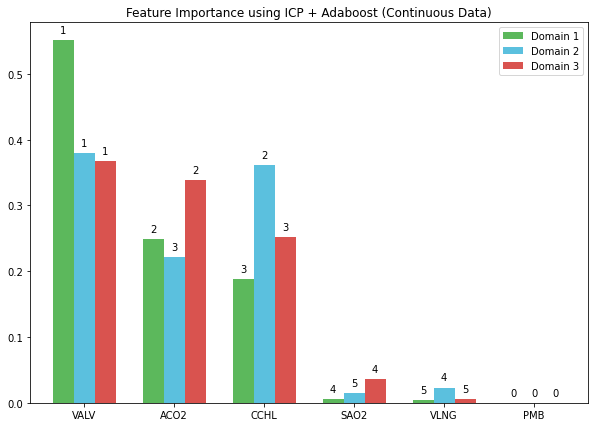

In [ ]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']

# plot with annotations is probably easier
p1 = df2n.plot.bar(width=0.7, color=colors, figsize=(10, 7),title='Feature Importance using ICP + Adaboost (Continuous Data)')
p1.set_xticklabels(p1.get_xticklabels(), rotation=0)

for p in p1.patches:
  # if p.get_height() > 0.0001:
    # p1.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    n = p.get_height()
    # print(n)
    r = 0
    if (a1[a1 == n].any()): r = a1[a1 == n].index[0]+1
    if (a2[a2 == n].any()): r = a2[a2 == n].index[0]+1
    if (a3[a3 == n].any()): r = a3[a3 == n].index[0]+1

    p1.annotate(r, (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RAda_ICP.pdf')

files.download('TLp_RAda_ICP.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

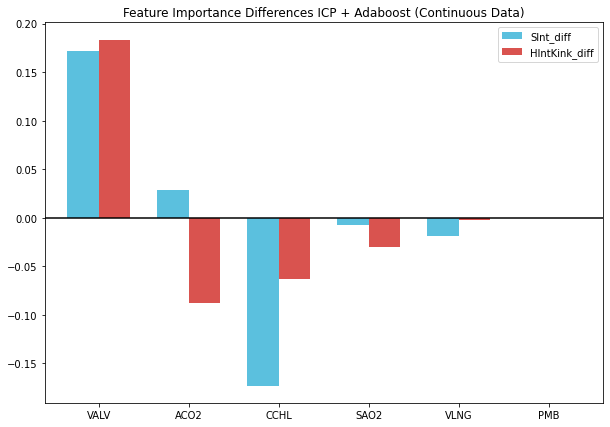

In [ ]:
import matplotlib.pyplot as plt
colors = ['#5bc0de', '#d9534f']

df = df2n
df['SInt_diff'] = df['Domain 1'] - df['Domain 2']
df['HIntKink_diff'] = df['Domain 1'] - df['Domain 3']
df = df.drop(['Domain 2','Domain 1','Domain 3'], axis = 1)

# plot with annotations is probably easier
p1 = df.plot.bar(width=0.7, color=colors,rot=0, figsize=(10, 7),title='Feature Importance Differences ICP + Adaboost (Continuous Data)')
plt.axhline(0, color='black')

In [ ]:
from google.colab import files
p1.get_figure().savefig('TLp_RAda_ICP_diff.pdf')

files.download('TLp_RAda_ICP_diff.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>